In [1]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read & Extract Data
def get_vars(file: str):
    with open(file, 'r') as f:
        text = f.read()

    val_acc_match = re.search(r'val\s*acc:\s*(\d+\.\d+)', text)
    test1_acc_match = re.search(r'test1\s*acc:\s*(\d+\.\d+)', text)
    test2_acc_match = re.search(r'test2\s*acc:\s*(\d+\.\d+)', text)
    test3_acc_match = re.search(r'test3\s*acc:\s*(\d+\.\d+)', text)
    if val_acc_match:
        val_acc = float(val_acc_match.group(1))
    else:
        val_acc = None
    if test1_acc_match:
        test1_acc = float(test1_acc_match.group(1))
    else:
        test1_acc = None
    if test2_acc_match:
        test2_acc = float(test2_acc_match.group(1))
    else:
        test2_acc = None
    if test3_acc_match:
        test3_acc = float(test3_acc_match.group(1))
    else:
        test3_acc = None
    return val_acc, test1_acc, test2_acc, test3_acc

In [2]:
# Test
folder = '../results/code_completion/different_author/codebert/checkpoints'
ckpt = os.listdir(folder)[-1]
file = os.path.join(folder, ckpt, 'parameters.txt')

val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
print(val_acc, test1_acc, test2_acc, test3_acc)

67.4534683227539 67.8434829711914 64.93063354492188 65.1856918334961


### Method Name Prediction

In [12]:
S = ['Different timelines', 'Different authors', 'Different projects']
# Rename the shift intensity names
shift_intensity_names = {
    'val_acc': 'In-dist.',
    'test1_acc': '1',
    'test2_acc': '2',
    'test3_acc': '3'
}

# res = []
# for shift in SHIFT:
#     for model in MODEL:
#         folder = f'../results/{TASK}/{shift}/{model}/checkpoints'
#         ckpt = os.listdir(folder)[-1]
#         file = os.path.join(folder, ckpt, 'parameters.txt')
#         val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
#         outputs = {
#             'Task': 'method name prediction',
#             'Shift type': shift,
#             'Model': model,
#             'val_acc': val_acc * 100,
#             'test1_acc': test1_acc * 100,
#             'test2_acc': test2_acc * 100,
#             'test3_acc': test3_acc * 100, 
#         }
#         res.append(outputs)

# df = pd.DataFrame(res)
# df

/tmp/ipykernel_4013663/1667244426.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
/home/yuli/anaconda3/envs/py3.10/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


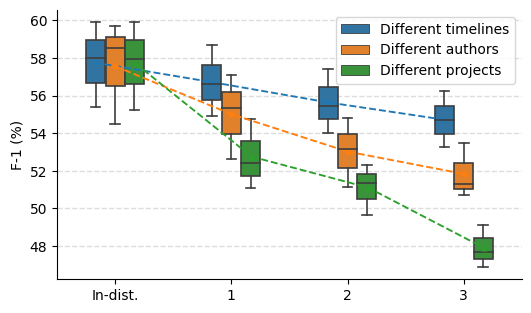

In [41]:
T = 'Method name prediction'
M = ['code2vec', 'coderoberta', 'graphcodebert']
res = [
    {'Task': T, 'Shift type': S[0], 'Model': M[0], 'val_acc': 55.390715, 'test1_acc': 54.890607, 'test2_acc': 54.030440, 'test3_acc': 53.241443},
    {'Task': T, 'Shift type': S[0], 'Model': M[1], 'val_acc': 57.966928, 'test1_acc': 56.587331, 'test2_acc': 55.468104, 'test3_acc': 54.701203},
    {'Task': T, 'Shift type': S[0], 'Model': M[2], 'val_acc': 59.893170, 'test1_acc': 58.682512, 'test2_acc': 57.427443, 'test3_acc': 56.225624},
    {'Task': T, 'Shift type': S[1], 'Model': M[0], 'val_acc': 54.485417, 'test1_acc': 52.617400, 'test2_acc': 51.119681, 'test3_acc': 50.704190},
    {'Task': T, 'Shift type': S[1], 'Model': M[1], 'val_acc': 58.502033, 'test1_acc': 55.334419, 'test2_acc': 53.139589, 'test3_acc': 51.314860},
    {'Task': T, 'Shift type': S[1], 'Model': M[2], 'val_acc': 59.686326, 'test1_acc': 57.082575, 'test2_acc': 54.806566, 'test3_acc': 53.490697},
    {'Task': T, 'Shift type': S[2], 'Model': M[0], 'val_acc': 55.254494, 'test1_acc': 51.080404, 'test2_acc': 49.660021, 'test3_acc': 46.890228},
    {'Task': T, 'Shift type': S[2], 'Model': M[1], 'val_acc': 57.964759, 'test1_acc': 52.417149, 'test2_acc': 51.363183, 'test3_acc': 47.699799},
    {'Task': T, 'Shift type': S[2], 'Model': M[2], 'val_acc': 59.903500, 'test1_acc': 54.766733, 'test2_acc': 52.318322, 'test3_acc': 49.123829},
]
df = pd.DataFrame(res)

# Melt the dataframe to convert it into the long format
melted_df = pd.melt(
    df, 
    id_vars=['Task', 'Shift type', 'Model'],
    value_vars=['val_acc', 'test1_acc', 'test2_acc', 'test3_acc'],
    var_name='Shift intensity', 
    value_name='F-1',
)
melted_df['Shift intensity'] = melted_df['Shift intensity'].map(shift_intensity_names)

dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
    id_vars='Shift type',
    var_name='Shift intensity', 
    value_name='F-1',
)
dfm_mean['Shift intensity'] = dfm_mean['Shift intensity'].map(shift_intensity_names)

plt.figure(figsize=(6, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1, zorder=0)
# Create the boxplot using seaborn
ax = sns.boxplot(data=melted_df, x='Shift intensity', y='F-1', hue='Shift type', width=0.5, linewidth=1.2)
ax.set_axisbelow(True)

# Plot a line plot with markers for the means
sns.pointplot(
    data=dfm_mean, 
    x='Shift intensity', 
    y='F-1', 
    hue='Shift type', 
    hue_order=['Different timelines', 'Different authors', 'Different projects'],
    errorbar=None,
    dodge=0.35, 
    scale=0.5,
    linestyles='--',
    markers=['x', 'o', '^'],
    # markercolors=['black', 'black', 'black'],
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles[:3], 
    labels=labels[:3], 
    # title="Shift Type",
    # bbox_to_anchor=(1.02, 1.02), 
    # loc='upper left',
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add title and labels to the plot
# plt.xlabel('Shift Intensity')
plt.xlabel('')
plt.ylabel('F-1 (%)')
plt.savefig('../Figure/method_name_prediction.pdf', bbox_inches='tight')

# Show the plot
plt.show()

### Code Completion

In [34]:
S = ['Different timelines', 'Different authors', 'Different projects']
T = 'code_completion'
M = ['lstm', 'codebert', 'codegpt']
res = []

# for shift in S:
#     for model in M:
#         folder = f'../results/{T}/{shift}/{model}/checkpoints'
#         ckpt = os.listdir(folder)[-1]
#         file = os.path.join(folder, ckpt, 'parameters.txt')
#         val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
#         outputs = {
#             'Task': T,
#             'Shift type': shift,
#             'Model': model,
#             'val_acc': val_acc,
#             'test1_acc': test1_acc,
#             'test2_acc': test2_acc,
#             'test3_acc': test3_acc, 
#         }
#         res.append(outputs)

# df = pd.DataFrame(res)
# df

/tmp/ipykernel_4013663/337611688.py:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
/home/yuli/anaconda3/envs/py3.10/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


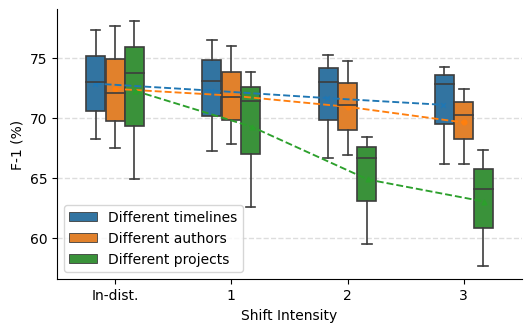

In [81]:
T = 'Code completion'
M = ['code2vec', 'coderoberta', 'graphcodebert']
res = [
    {'Task': T, 'Shift type': S[0], 'Model': M[0], 'val_acc': 73.017380, 'test1_acc': 73.116398, 'test2_acc': 73.028721, 'test3_acc': 72.855602},
    {'Task': T, 'Shift type': S[0], 'Model': M[1], 'val_acc': 68.204422, 'test1_acc': 67.246265, 'test2_acc': 66.639973, 'test3_acc': 66.166599},
    {'Task': T, 'Shift type': S[0], 'Model': M[2], 'val_acc': 77.361252, 'test1_acc': 76.465508, 'test2_acc': 75.276009, 'test3_acc': 74.238998},
    {'Task': T, 'Shift type': S[1], 'Model': M[0], 'val_acc': 72.099663, 'test1_acc': 71.724686, 'test2_acc': 71.069344, 'test3_acc': 70.267476},
    {'Task': T, 'Shift type': S[1], 'Model': M[1], 'val_acc': 67.453468, 'test1_acc': 67.843483, 'test2_acc': 66.930634, 'test3_acc': 66.185692},
    {'Task': T, 'Shift type': S[1], 'Model': M[2], 'val_acc': 77.705154, 'test1_acc': 76.007880, 'test2_acc': 74.766647, 'test3_acc': 72.389117},
    {'Task': T, 'Shift type': S[2], 'Model': M[0], 'val_acc': 73.762337, 'test1_acc': 71.416771, 'test2_acc': 66.682344, 'test3_acc': 64.095497},
    {'Task': T, 'Shift type': S[2], 'Model': M[1], 'val_acc': 64.935867, 'test1_acc': 62.546444, 'test2_acc': 59.457111, 'test3_acc': 57.590852},
    {'Task': T, 'Shift type': S[2], 'Model': M[2], 'val_acc': 78.047554, 'test1_acc': 73.819000, 'test2_acc': 68.419258, 'test3_acc': 67.348854},
]

df = pd.DataFrame(res)
# Rename the shift intensity names
shift_intensity_names = {
    'val_acc': 'In-dist.',
    'test1_acc': '1',
    'test2_acc': '2',
    'test3_acc': '3'
}

# Melt the dataframe to convert it into the long format
melted_df = pd.melt(
    df, 
    id_vars=['Task', 'Shift type', 'Model'],
    value_vars=['val_acc', 'test1_acc', 'test2_acc', 'test3_acc'],
    var_name='Shift intensity', 
    value_name='F-1',
)
melted_df['Shift intensity'] = melted_df['Shift intensity'].map(shift_intensity_names)

dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
    id_vars='Shift type',
    var_name='Shift intensity', 
    value_name='F-1',
)
dfm_mean['Shift intensity'] = dfm_mean['Shift intensity'].map(shift_intensity_names)


plt.figure(figsize=(6, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
# Create the boxplot using seaborn
ax = sns.boxplot(data=melted_df, x='Shift intensity', y='F-1', hue='Shift type', width=0.5, linewidth=1.2)
ax.set_axisbelow(True)

# Plot a line plot with markers for the means
sns.pointplot(
    data=dfm_mean, 
    x='Shift intensity', 
    y='F-1', 
    hue='Shift type', 
    hue_order=['Different timelines', 'Different authors', 'Different projects'],
    errorbar=None,
    dodge=0.35, 
    scale=0.5,
    linestyles='--',
    markers=['x', 'o', '^'],
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles[:3], 
    labels=labels[:3], 
    # title="Shift Type",
    # bbox_to_anchor=(1.02, 1.02), 
    # loc='upper left',
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add title and labels to the plot
plt.xlabel('Shift Intensity')
plt.ylabel('F-1 (%)')
plt.savefig('../Figure/code_completion.pdf', bbox_inches='tight')

# Show the plot
plt.show()